# Data Exploration 

The first part of the problem is exploring the data by cleaning it -
1. taking care of the nan values  
2. Dropping the redudant columns 
3. Encoding the classes of non numerical features. 
4. Finding the correlation of features with the label column

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

## Checking out the data 

In [2]:
df_train = pd.read_csv('ML_Artivatic_dataset/train_indessa.csv')
df_train

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


There are certain columns that are indenitifiers like 'batch_enrolled', 'member_id', these features don't affect us in the classification task.<br>
There are some features that shouldn't be considered in the classification task because they would generate unfair biasis in the model like - 'emp_title', 'desc', 'title'. 
All these features shouldn't be used in training and testing of the model, and hence we will not handle the preprocessing of these features.

## Handling the null values in the dataset 

In [3]:
df_train.isna().any()

member_id                      False
loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
batch_enrolled                  True
int_rate                       False
grade                          False
sub_grade                      False
emp_title                       True
emp_length                      True
home_ownership                 False
annual_inc                      True
verification_status            False
pymnt_plan                     False
desc                            True
purpose                        False
title                           True
zip_code                       False
addr_state                     False
dti                            False
delinq_2yrs                     True
inq_last_6mths                  True
mths_since_last_delinq          True
mths_since_last_record          True
open_acc                        True
pub_rec                         True
r

In [4]:
# making a list of all the columns which have nulls values present 
null_colls = df_train.columns[df_train.isna().any()].tolist()
null_colls

['batch_enrolled',
 'emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

### Checking columns individually 
We need to understand the kind of data present in all these columns in order to determine the value of the nan values 

Features excluded - 'batch_enrolled', 'emp_title', 'desc'and 'title'

When replacing the null values we will be using median for most of the continuous distributions and mode for the categorical features.<br>
so for median we have the features - 'annual_inc', 'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_util','total_acc','collections_12_mths_ex_med','mths_since_last_major_derog','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'
<br>
for mode we have the features - 'delinq_2yrs','inq_last_6mths' and 'emp_length'<br>
verification_status_joint it would be wrong to assume the verfication status so it is better to keep it 'Not Verified'

In [5]:
def median_replacement(feature):
    median = feature.median(skipna=True)
    feature.fillna(median, inplace=True)
    print(feature.isna().any())
    return feature 
median_replaceable = ['annual_inc', 'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_util','total_acc','collections_12_mths_ex_med','mths_since_last_major_derog','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

def mode_replacement(feature):
    mode = feature.mode(dropna=True)
    feature.fillna(mode[0], inplace=True)
    print(feature.isna().any())
    return feature
mode_replaceable = ['emp_length', 'delinq_2yrs', 'inq_last_6mths']

In [6]:
# taking care of null values
for i in median_replaceable:
    df_train[i] = median_replacement(df_train[i])

False
False
False
False
False
False
False
False
False
False
False
False
False


In [7]:
for i in mode_replaceable:
    df_train[i] = mode_replacement(df_train[i])

False
False
False


In [8]:
df_train['verification_status_joint'].fillna('Not Verified', inplace=True)
df_train['verification_status_joint'].isna().any()

False

In [9]:
df_train.total_rev_hi_lim.isna().any()

False

## Removing the redundant columns 

In [10]:
drop_cols = ['batch_enrolled', 'desc', 'title', 'emp_title']
df_train.drop(drop_cols, 1, inplace=True)
df_train.isna().any()

member_id                      False
loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
grade                          False
sub_grade                      False
emp_length                     False
home_ownership                 False
annual_inc                     False
verification_status            False
pymnt_plan                     False
purpose                        False
zip_code                       False
addr_state                     False
dti                            False
delinq_2yrs                    False
inq_last_6mths                 False
mths_since_last_delinq         False
mths_since_last_record         False
open_acc                       False
pub_rec                        False
revol_bal                      False
revol_util                     False
total_acc                      False
initial_list_status            False
t

## Handling columns with categorical data 

In [11]:
# in order to do statistical analysis and develop a ML model we need to convert all our data into numerical format 
from sklearn.preprocessing import LabelEncoder

# making a list of columns with categorical data

cat_cols = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
            'pymnt_plan', 'purpose', 'initial_list_status', 'application_type', 
            'verification_status_joint', 'zip_code', 'addr_state']
le = {}

for col in cat_cols:
    le[col] = LabelEncoder()
    le[col] = le[col].fit(df_train[col])
    df_train[col] = le[col].transform(df_train[col])
    le[col].classes_ = np.append(le[col].classes_, 'other')
    
    print('Encoded: ', col)


Encoded:  grade
Encoded:  sub_grade
Encoded:  emp_length
Encoded:  home_ownership
Encoded:  verification_status
Encoded:  pymnt_plan
Encoded:  purpose
Encoded:  initial_list_status
Encoded:  application_type
Encoded:  verification_status_joint
Encoded:  zip_code
Encoded:  addr_state


In [12]:
# checking out the data t take care of the rest of the columns 
pd.set_option("display.max.columns", None)
df_train

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,19.19,4,22,9,4,28700.0,1,0,2,333,9,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,74.0,0,0,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,10.99,1,8,10,1,65000.0,1,0,4,195,20,3.64,0.0,1.0,31.0,70.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,44.0,0,0,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,7.26,0,3,2,4,45000.0,0,0,2,427,35,18.42,0.0,0.0,31.0,70.0,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,44.0,0,0,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,19.72,3,19,1,5,105000.0,0,0,2,206,45,14.97,0.0,2.0,46.0,70.0,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,44.0,0,0,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,10.64,1,6,1,5,52000.0,2,0,1,821,4,20.16,0.0,0.0,31.0,70.0,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,44.0,0,0,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,12.49,1,9,1,1,75000.0,1,0,2,460,22,14.53,0.0,0.0,31.0,51.0,12.0,1.0,15775.0,63.6,34.0,0,2595.45,0.0,0.0,0.0,0.0,44.0,0,0,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,14.99,2,14,1,1,59000.0,0,0,2,475,22,22.97,0.0,0.0,31.0,81.0,10.0,1.0,9453.0,53.1,29.0,1,2182.92,0.0,0.0,0.0,0.0,44.0,0,0,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,20.80,4,20,8,5,42504.0,2,0,2,354,42,27.27,0.0,1.0,26.0,70.0,14.0,0.0,12085.0,49.9,26.0,0,645.32,0.0,0.0,0.0,0.0,44.0,0,0,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,16.29,3,16,0,5,50000.0,1,0,1,412,35,14.91,0.0,1.0,31.0,70.0,7.0,0.0,20902.0,89.7,14.0,1,4619.79,0.0,0.0,0.0,0.0,44.0,0,0,78th week,0.0,0.0,29197.0,23300.0,0


In [13]:
term_1 = df_train['term'][0]
term_1[:-7]

'36'

In [14]:
df_train.term = [int(i[:-7]) for i in df_train.term]
df_train.term

0         36
1         36
2         36
3         36
4         36
          ..
532423    36
532424    60
532425    60
532426    60
532427    36
Name: term, Length: 532428, dtype: int64

In [15]:
df_train.last_week_pay.unique()

array(['26th week', '9th week', '135th week', '96th week', '113th week',
       '117th week', '78th week', '44th week', '52th week', '95th week',
       '48th week', '82th week', '35th week', '104th week', '17th week',
       '13th week', 'NAth week', '31th week', '30th week', '70th week',
       '4th week', '91th week', '65th week', '39th week', '83th week',
       '74th week', '22th week', '61th week', '156th week', '122th week',
       '174th week', '87th week', '139th week', '0th week', '57th week',
       '131th week', '152th week', '43th week', '161th week', '56th week',
       '170th week', '157th week', '109th week', '126th week',
       '100th week', '148th week', '265th week', '165th week',
       '261th week', '213th week', '222th week', '196th week',
       '130th week', '144th week', '244th week', '204th week',
       '69th week', '217th week', '143th week', '191th week', '21th week',
       '226th week', '18th week', '108th week', '79th week', '183th week',
       '178th 

In [16]:
# we need to place NAth week with 0th week 
for i in range(len(df_train.last_week_pay)):
    if df_train.last_week_pay[i] == 'NAth week':
        df_train.last_week_pay[i] = '0th week'
df_train.last_week_pay.unique()

<ipython-input-16-26bcc02cdede>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.last_week_pay[i] = '0th week'


array(['26th week', '9th week', '135th week', '96th week', '113th week',
       '117th week', '78th week', '44th week', '52th week', '95th week',
       '48th week', '82th week', '35th week', '104th week', '17th week',
       '13th week', '0th week', '31th week', '30th week', '70th week',
       '4th week', '91th week', '65th week', '39th week', '83th week',
       '74th week', '22th week', '61th week', '156th week', '122th week',
       '174th week', '87th week', '139th week', '57th week', '131th week',
       '152th week', '43th week', '161th week', '56th week', '170th week',
       '157th week', '109th week', '126th week', '100th week',
       '148th week', '265th week', '165th week', '261th week',
       '213th week', '222th week', '196th week', '130th week',
       '144th week', '244th week', '204th week', '69th week',
       '217th week', '143th week', '191th week', '21th week',
       '226th week', '18th week', '108th week', '79th week', '183th week',
       '178th week', '187th

In [17]:
df_train.last_week_pay = [int(i[:-7]) for i in df_train.last_week_pay]
df_train.last_week_pay

0          26
1           9
2           9
3         135
4          96
         ... 
532423     65
532424     70
532425      9
532426     78
532427     44
Name: last_week_pay, Length: 532428, dtype: int64

In [18]:
df_train

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,19.19,4,22,9,4,28700.0,1,0,2,333,9,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,74.0,0,0,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,10.99,1,8,10,1,65000.0,1,0,4,195,20,3.64,0.0,1.0,31.0,70.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,44.0,0,0,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,7.26,0,3,2,4,45000.0,0,0,2,427,35,18.42,0.0,0.0,31.0,70.0,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,44.0,0,0,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,19.72,3,19,1,5,105000.0,0,0,2,206,45,14.97,0.0,2.0,46.0,70.0,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,44.0,0,0,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,10.64,1,6,1,5,52000.0,2,0,1,821,4,20.16,0.0,0.0,31.0,70.0,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,44.0,0,0,96,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,12.49,1,9,1,1,75000.0,1,0,2,460,22,14.53,0.0,0.0,31.0,51.0,12.0,1.0,15775.0,63.6,34.0,0,2595.45,0.0,0.0,0.0,0.0,44.0,0,0,65,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,14.99,2,14,1,1,59000.0,0,0,2,475,22,22.97,0.0,0.0,31.0,81.0,10.0,1.0,9453.0,53.1,29.0,1,2182.92,0.0,0.0,0.0,0.0,44.0,0,0,70,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,20.80,4,20,8,5,42504.0,2,0,2,354,42,27.27,0.0,1.0,26.0,70.0,14.0,0.0,12085.0,49.9,26.0,0,645.32,0.0,0.0,0.0,0.0,44.0,0,0,9,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,16.29,3,16,0,5,50000.0,1,0,1,412,35,14.91,0.0,1.0,31.0,70.0,7.0,0.0,20902.0,89.7,14.0,1,4619.79,0.0,0.0,0.0,0.0,44.0,0,0,78,0.0,0.0,29197.0,23300.0,0


In [19]:
df_train.to_csv('ML_Artivatic_dataset/df_train_clean.csv', index=False)

## Feature Selection 

Before training a machine learning model it is important for us to perform feature selection in order to get rid of redudant features, Since our output is categorical and the features are a mix of categorical and numeric we would be doing feature selection using 2 methods - 
1. <b>ANOVA f-test Feature Selection</b> - for numerical input features we would use this test 
2. <b> Mutual Information Feature Selection </b> - for categorical input we would be using this test 

### Numeric Input

In [20]:
# Numerical input 
cols = df_train.columns.values.tolist()
num_cols = []
for i in cols:
    if i not in cat_cols:
        num_cols.append(i)
num_cols

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'last_week_pay',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']

In [21]:
num_cols.remove('member_id')
num_cols.remove('loan_status')

In [22]:
X_train = df_train[num_cols]
y_train = df_train['loan_status']

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
def select_features_num(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    return fs.scores_

In [24]:
features = list(select_features_num(X_train, y_train))
features 

[4922.610925819541,
 5116.665753510761,
 5584.015671386367,
 9290.63133879405,
 3.570523662317132,
 39.36050961700536,
 9738.013695475005,
 1115.7691874003942,
 4089.534695613601,
 116.26616046264577,
 383.34008635819765,
 2262.4969039004955,
 1275.9451752583682,
 855.4404878630052,
 1187.468523958423,
 3.6982329302615358,
 783.9587238381168,
 10.087996603995155,
 2060.1239525588107,
 978.1729519741316,
 613.9610782103958,
 13.092201516837903,
 41224.054714805614,
 110.6873075021374,
 291.1102681475684,
 423.3795746004843,
 893.6170180755009]

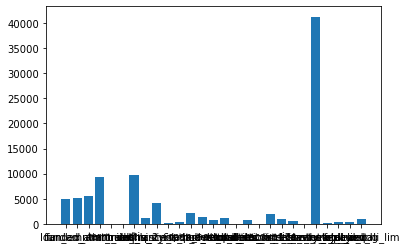

In [25]:
# bar plot of the feature correlation 
plt.bar(num_cols, features)
plt.show()

In [26]:
feature_dict = {}

for i in range(len(num_cols)):
    feature_dict[num_cols[i]] = features[i]
feature_dict

{'loan_amnt': 4922.610925819541,
 'funded_amnt': 5116.665753510761,
 'funded_amnt_inv': 5584.015671386367,
 'term': 9290.63133879405,
 'int_rate': 3.570523662317132,
 'annual_inc': 39.36050961700536,
 'dti': 9738.013695475005,
 'delinq_2yrs': 1115.7691874003942,
 'inq_last_6mths': 4089.534695613601,
 'mths_since_last_delinq': 116.26616046264577,
 'mths_since_last_record': 383.34008635819765,
 'open_acc': 2262.4969039004955,
 'pub_rec': 1275.9451752583682,
 'revol_bal': 855.4404878630052,
 'revol_util': 1187.468523958423,
 'total_acc': 3.6982329302615358,
 'total_rec_int': 783.9587238381168,
 'total_rec_late_fee': 10.087996603995155,
 'recoveries': 2060.1239525588107,
 'collection_recovery_fee': 978.1729519741316,
 'collections_12_mths_ex_med': 613.9610782103958,
 'mths_since_last_major_derog': 13.092201516837903,
 'last_week_pay': 41224.054714805614,
 'acc_now_delinq': 110.6873075021374,
 'tot_coll_amt': 291.1102681475684,
 'tot_cur_bal': 423.3795746004843,
 'total_rev_hi_lim': 893.617

In [27]:
sorted_values = sorted(feature_dict.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in feature_dict.keys():
        if feature_dict[k] == i:
            sorted_dict[k] = feature_dict[k]
            break
sorted_dict

{'int_rate': 3.570523662317132,
 'total_acc': 3.6982329302615358,
 'total_rec_late_fee': 10.087996603995155,
 'mths_since_last_major_derog': 13.092201516837903,
 'annual_inc': 39.36050961700536,
 'acc_now_delinq': 110.6873075021374,
 'mths_since_last_delinq': 116.26616046264577,
 'tot_coll_amt': 291.1102681475684,
 'mths_since_last_record': 383.34008635819765,
 'tot_cur_bal': 423.3795746004843,
 'collections_12_mths_ex_med': 613.9610782103958,
 'total_rec_int': 783.9587238381168,
 'revol_bal': 855.4404878630052,
 'total_rev_hi_lim': 893.6170180755009,
 'collection_recovery_fee': 978.1729519741316,
 'delinq_2yrs': 1115.7691874003942,
 'revol_util': 1187.468523958423,
 'pub_rec': 1275.9451752583682,
 'recoveries': 2060.1239525588107,
 'open_acc': 2262.4969039004955,
 'inq_last_6mths': 4089.534695613601,
 'loan_amnt': 4922.610925819541,
 'funded_amnt': 5116.665753510761,
 'funded_amnt_inv': 5584.015671386367,
 'term': 9290.63133879405,
 'dti': 9738.013695475005,
 'last_week_pay': 41224.05

In [28]:
# top 15 features according to the ANOVA f-test feature selection 
top15_num = list(sorted_dict.keys())[-15:]

### Categorical input 

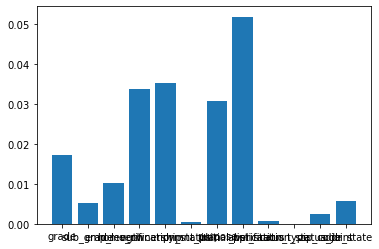

In [29]:
from sklearn.feature_selection import mutual_info_classif

X_train = df_train[cat_cols]
y_train = df_train['loan_status']

def select_features_cat(X_train, y_train):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    return fs.scores_
features = list(select_features_cat(X_train, y_train))

plt.bar(cat_cols, features)
plt.show()

In [30]:
feature_dict = {}

for i in range(len(cat_cols)):
    feature_dict[cat_cols[i]] = features[i]

sorted_values = sorted(feature_dict.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in feature_dict.keys():
        if feature_dict[k] == i:
            sorted_dict[k] = feature_dict[k]
            break
sorted_dict

{'verification_status_joint': 0.0,
 'pymnt_plan': 0.00048083410952903805,
 'application_type': 0.0007223129791902316,
 'zip_code': 0.0025913802053951773,
 'sub_grade': 0.005195122029222121,
 'addr_state': 0.005838901165247323,
 'emp_length': 0.010182099069480754,
 'grade': 0.017306432597347543,
 'purpose': 0.030638111834522697,
 'home_ownership': 0.03376266490099211,
 'verification_status': 0.03515972343198448,
 'initial_list_status': 0.05180864851011591}

from observation we shouldn't take more than last 5 features 

In [31]:
top_cat = list(sorted_dict.keys())[-5:]
top_cat

['grade',
 'purpose',
 'home_ownership',
 'verification_status',
 'initial_list_status']

In [39]:
feature_names = top15_num + top_cat
feature_names

['revol_bal',
 'total_rev_hi_lim',
 'collection_recovery_fee',
 'delinq_2yrs',
 'revol_util',
 'pub_rec',
 'recoveries',
 'open_acc',
 'inq_last_6mths',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'dti',
 'last_week_pay',
 'grade',
 'purpose',
 'home_ownership',
 'verification_status',
 'initial_list_status']

## Feature Engineering 

on analyzing the features we can creat some new features, which might be useful in our task

In [33]:
# Extract a new feature from term and last week pay

df_train.insert(0, 'payment_completion', (df_train['last_week_pay']/(df_train['term']/12*52+1))*100)
df_train['payment_completion'] = df_train['payment_completion'].astype(int)

In [34]:
# Extract a new feature from funded_amnt_inv / loan_amnt

df_train.insert(0, 'funded_ratio', (df_train['funded_amnt_inv']/df_train['loan_amnt'])*100)
df_train['funded_ratio'] = df_train['funded_ratio'].astype(int)

In [35]:
df_train

,funded_ratio,payment_completion,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,100,16,58189336,14350,14350,14350.0,36,19.19,4,22,9,4,28700.0,1,0,2,333,9,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,74.0,0,0,26,0.0,0.0,28699.0,30800.0,0
1,100,5,70011223,4800,4800,4800.0,36,10.99,1,8,10,1,65000.0,1,0,4,195,20,3.64,0.0,1.0,31.0,70.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,44.0,0,0,9,0.0,0.0,9974.0,32900.0,0
2,100,5,70255675,10000,10000,10000.0,36,7.26,0,3,2,4,45000.0,0,0,2,427,35,18.42,0.0,0.0,31.0,70.0,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,44.0,0,0,9,0.0,65.0,38295.0,34900.0,0
3,100,85,1893936,15000,15000,15000.0,36,19.72,3,19,1,5,105000.0,0,0,2,206,45,14.97,0.0,2.0,46.0,70.0,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,44.0,0,0,135,0.0,0.0,55564.0,24700.0,0
4,100,61,7652106,16000,16000,16000.0,36,10.64,1,6,1,5,52000.0,2,0,1,821,4,20.16,0.0,0.0,31.0,70.0,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,44.0,0,0,96,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,100,41,31296187,20000,20000,20000.0,36,12.49,1,9,1,1,75000.0,1,0,2,460,22,14.53,0.0,0.0,31.0,51.0,12.0,1.0,15775.0,63.6,34.0,0,2595.45,0.0,0.0,0.0,0.0,44.0,0,0,65,0.0,0.0,83087.0,24800.0,0
532424,100,26,29403184,12000,12000,12000.0,60,14.99,2,14,1,1,59000.0,0,0,2,475,22,22.97,0.0,0.0,31.0,81.0,10.0,1.0,9453.0,53.1,29.0,1,2182.92,0.0,0.0,0.0,0.0,44.0,0,0,70,0.0,0.0,227812.0,17800.0,0
532425,100,3,7357607,18725,18725,18725.0,60,20.80,4,20,8,5,42504.0,2,0,2,354,42,27.27,0.0,1.0,26.0,70.0,14.0,0.0,12085.0,49.9,26.0,0,645.32,0.0,0.0,0.0,0.0,44.0,0,0,9,0.0,0.0,26010.0,24200.0,1
532426,100,29,23182668,21000,21000,21000.0,60,16.29,3,16,0,5,50000.0,1,0,1,412,35,14.91,0.0,1.0,31.0,70.0,7.0,0.0,20902.0,89.7,14.0,1,4619.79,0.0,0.0,0.0,0.0,44.0,0,0,78,0.0,0.0,29197.0,23300.0,0


Lets conduct an ANOVA f-test on the features we engineered to see if they are useful or redundant 

In [36]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(df_train[['funded_ratio', 'payment_completion']], df_train['loan_status'])
fs.scores_

array([ 5450.20142215, 55471.01402023])

So, we can see that these features are very relevant with payment completition being the most relevant feature so far 

In [40]:
# creating the final training dataset 

feature_names = ['member_id'] +feature_names + ['funded_ratio', 'payment_completion', 'loan_status']

train = df_train[feature_names]
train

,member_id,revol_bal,total_rev_hi_lim,collection_recovery_fee,delinq_2yrs,revol_util,pub_rec,recoveries,open_acc,inq_last_6mths,loan_amnt,funded_amnt,funded_amnt_inv,term,dti,last_week_pay,grade,purpose,home_ownership,verification_status,initial_list_status,funded_ratio,payment_completion,loan_status
0,58189336,22515.0,30800.0,0.0,0.0,73.1,1.0,0.0,14.0,1.0,14350,14350,14350.0,36,33.88,26,4,2,4,1,0,100,16,0
1,70011223,7624.0,32900.0,0.0,0.0,23.2,0.0,0.0,6.0,1.0,4800,4800,4800.0,36,3.64,9,1,4,1,1,1,100,5,0
2,70255675,10877.0,34900.0,0.0,0.0,31.2,0.0,0.0,5.0,0.0,10000,10000,10000.0,36,18.42,9,0,2,4,0,1,100,5,0
3,1893936,13712.0,24700.0,0.0,0.0,55.5,0.0,0.0,10.0,2.0,15000,15000,15000.0,36,14.97,135,3,2,5,0,0,100,85,0
4,7652106,35835.0,47033.0,0.0,0.0,76.2,0.0,0.0,11.0,0.0,16000,16000,16000.0,36,20.16,96,1,1,5,2,1,100,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,15775.0,24800.0,0.0,0.0,63.6,1.0,0.0,12.0,0.0,20000,20000,20000.0,36,14.53,65,1,2,1,1,0,100,41,0
532424,29403184,9453.0,17800.0,0.0,0.0,53.1,1.0,0.0,10.0,0.0,12000,12000,12000.0,60,22.97,70,2,2,1,0,1,100,26,0
532425,7357607,12085.0,24200.0,0.0,0.0,49.9,0.0,0.0,14.0,1.0,18725,18725,18725.0,60,27.27,9,4,2,5,2,0,100,3,1
532426,23182668,20902.0,23300.0,0.0,0.0,89.7,0.0,0.0,7.0,1.0,21000,21000,21000.0,60,14.91,78,3,1,5,1,1,100,29,0


In [41]:
train.to_csv('ML_Artivatic_dataset/train.csv', index=False)

In [42]:
le 

{'grade': LabelEncoder(),
 'sub_grade': LabelEncoder(),
 'emp_length': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'verification_status': LabelEncoder(),
 'pymnt_plan': LabelEncoder(),
 'purpose': LabelEncoder(),
 'initial_list_status': LabelEncoder(),
 'application_type': LabelEncoder(),
 'verification_status_joint': LabelEncoder(),
 'zip_code': LabelEncoder(),
 'addr_state': LabelEncoder()}

## Encoding Labels for Categorical data in test set 

In [48]:
df_test = pd.read_csv('ML_Artivatic_dataset/df_test_clean.csv')
cat_cols = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
            'pymnt_plan', 'purpose', 'initial_list_status', 'application_type', 
            'verification_status_joint','addr_state']
for col in cat_cols:
    df_test[col] = le[col].transform(df_test[col])
    
    print('Encoded: ', col)


Encoded:  grade
Encoded:  sub_grade
Encoded:  emp_length
Encoded:  home_ownership
Encoded:  verification_status
Encoded:  pymnt_plan
Encoded:  purpose
Encoded:  initial_list_status
Encoded:  application_type
Encoded:  verification_status_joint
Encoded:  addr_state


In [49]:
df_test.to_csv('ML_Artivatic_dataset/df_test_clean.csv', index=False)